In [1]:
#!ls /home/sutclw/Work/Preparation/Projects/translation/Data

In [3]:
import pandas as pd
import numpy as np

file = "en_fr"
#df = pd.read_csv("/home/sutclw/Work/Preparation/Projects/translation/Notebooks/en_ru.csv")
#df2 = pd.read_csv("/home/sutclw/Work/Preparation/Projects/translation/Notebooks/en_ru_2.csv")
#df = pd.read_csv("/home/sutclw/Work/Preparation/Projects/translation/Notebooks/de_en.csv")
df1 = pd.read_csv("/home/sutclw/Work/Preparation/Projects/translation/Data/en_ru_1m_yandex.csv")
df2 = pd.read_csv("/home/sutclw/Work/Preparation/Projects/translation/Data/sub.csv")[:30000:]
df3 = pd.read_csv("/home/sutclw/Work/Preparation/Projects/translation/Data/en_ru.csv")[:30000]
df4 = pd.read_csv("/home/sutclw/Work/Preparation/Projects/translation/Data/news.csv")[:30000]
df2 = df2.dropna()
df2 = df2.drop_duplicates()
df = pd.concat([df1,df2,df3,df4])
df = df.reset_index()

df['lenru'] = df.ru.apply(lambda x:len(x.split()))
df['lenen'] = df.en.apply(lambda x:len(x.split()))
df = df.loc[ (df.lenen < 60) & (df.lenru < 60)]
df.to_csv("test.csv")

In [7]:
df4

,Unnamed: 0,ru,en
0,0,золото по 10 000 долларов?,"$10,000 gold?"
1,1,сан-франціско. разговор о стоимости золота ред...,san francisco – it has never been easy to have...
2,2,еще в декабре прошлого года экономисты-коллеги...,"lately, with gold prices up more than 300% ove..."
3,3,и что бы вы думали?,wouldn’t you know it?
4,4,"с тех пор как вышли их статьи, стоимость золот...","since their articles appeared, the price of go..."
...,...,...,...
29995,29995,"это разожгло обвинения в том, что китайские ап...","back in beijing, the chief preoccupation is to..."
29996,29996,но теории заговора являются ошибочными.,"by the end of this year, china’s exports will ..."
29997,29997,всемирный банк прилагает усилия доброй воли дл...,but trade will probably not be the main worry ...
29998,29998,"конечно, в данных продолжают зиять отверстия.",political leaders in eu capitals and the us ma...


In [31]:
ns = dfnew.ru.apply(lambda x:len(x.split()))

NameError: name 'dfnew' is not defined

In [32]:
len(dfnew)

NameError: name 'dfnew' is not defined

<AxesSubplot: >

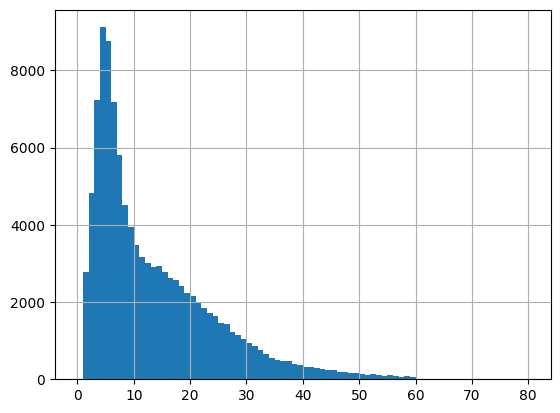

In [33]:
import matplotlib.pyplot as plt

df.lenru.hist(range=(0,80),bins=80)

# Load Data

In [34]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

#tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-ru-en")

#model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-ru-en")

In [ ]:
dog

In [ ]:
(0, 1, 0 ,0 )

In [35]:
import torch
from translation.models.encoder import Encoder
from translation.models.decoder import Decoder
from translation.models.transformers import Transformer
from translation.training.littrainer import  LitTrainer
import numpy as np
from datasets import load_dataset
from torch.utils.data import DataLoader
from transformers import AutoTokenizer
from transformers import DataCollatorForSeq2Seq
import pytorch_lightning as pl
from translation.models.transformers import Transformer
from translation.models.encoder import Encoder
from translation.models.decoder import Decoder
from pytorch_lightning import loggers as pl_loggers

def preprocess_function(batch,lang='en-ru'):
    l1 = lang.split('-')[0]
    l2 = lang.split('-')[1]
    model_inputs = tokenizer(
        batch[l1], max_length=max_input_length, truncation=True)

    # Set up the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(batch[l2], max_length=max_target_length, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs



torch.set_float32_matmul_precision('medium')
raw_dataset = load_dataset('csv',
        data_files='test.csv')
print(raw_dataset)
lang_pair = "en-ru"
l1 = lang_pair.split('-')[0]
l2 = lang_pair.split('-')[1]
lang_pair = "en-ru"
model_checkpoint = f"Helsinki-NLP/opus-mt-{lang_pair}"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
split = raw_dataset['train'].train_test_split(test_size=0.01, seed=42)
max_input_length = 60
max_target_length = 60

tokenized_datasets = split.map(
    preprocess_function,
    batched=True,
    remove_columns=split["train"].column_names,
)


data_collator = DataCollatorForSeq2Seq(tokenizer)
batch = data_collator([tokenized_datasets["train"][i] for i in range(0, 5)])
batch.keys()


train_loader = DataLoader(
    tokenized_datasets["train"],
    shuffle=True,
    batch_size=64,
    collate_fn=data_collator,
    num_workers=8, pin_memory=True,
)
valid_loader = DataLoader(
    tokenized_datasets["test"],
    batch_size=64,
    collate_fn=data_collator,
    num_workers=8, pin_memory=True
)



Using custom data configuration default-95c80a706337d9e1


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/home/sutclw/.local/lib/python3.10/site-packages/datasets/download/streaming_download_manager.py:776: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


Dataset csv downloaded and prepared to /home/sutclw/.cache/huggingface/datasets/csv/default-95c80a706337d9e1/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0.1', 'index', 'Unnamed: 0', 'ru', 'en', 'lenru', 'lenen'],
        num_rows: 107227
    })
})


  0%|          | 0/107 [00:00<?, ?ba/s]

/home/sutclw/anaconda3/envs/torch/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3581: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?ba/s]

In [36]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 106154
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1073
    })
})

# Load Model

In [37]:
dkey = 64
dmodel = 512
nheads = 8
nlayers = 5
dropout = 0.1

encoder = Encoder(vocab_size=tokenizer.vocab_size + 1,
                  max_len=60,
                  d_key=16,
                  d_model=128,
                  n_heads=8,
                  n_layers=4,
                  dropout_prob=0.1)
decoder = Decoder(vocab_size=tokenizer.vocab_size + 1,
                  max_len=60,
                  d_key=16,
                  d_model=128,
                  n_heads=8,
                  n_layers=4,
                  dropout_prob=0.1)
transformer = Transformer(encoder, decoder)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
encoder.to(device)
decoder.to(device)

Using encoder without a target.
cuda:0


Decoder(
  (embedding): Embedding(62519, 128)
  (pos_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_blocks): Sequential(
    (0): DecoderBlock(
      (linear1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (linear2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (linear3): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (mhatt1): MultiHeadAttention(
        (key): Linear(in_features=128, out_features=128, bias=True)
        (query): Linear(in_features=128, out_features=128, bias=True)
        (value): Linear(in_features=128, out_features=128, bias=True)
        (fc): Linear(in_features=128, out_features=128, bias=True)
      )
      (mhatt2): MultiHeadAttention(
        (key): Linear(in_features=128, out_features=128, bias=True)
        (query): Linear(in_features=128, out_features=128, bias=True)
        (value): Linear(in_features=128, out_features=128, bias=True)
        (fc): Linear(in_features

In [38]:
from torchinfo import summary
# summary(model, input_size=(16,512), dtypes=['torch.IntTensor'], device='cpu')
summary(transformer)

Layer (type:depth-idx)                        Param #
Transformer                                   --
├─Encoder: 1-1                                --
│    └─Embedding: 2-1                         8,002,432
│    └─PositionalEncoding: 2-2                --
│    │    └─Dropout: 3-1                      --
│    └─Sequential: 2-3                        --
│    │    └─EncoderBlock: 3-2                 198,272
│    │    └─EncoderBlock: 3-3                 198,272
│    │    └─EncoderBlock: 3-4                 198,272
│    │    └─EncoderBlock: 3-5                 198,272
│    └─LayerNorm: 2-4                         256
├─Decoder: 1-2                                --
│    └─Embedding: 2-5                         8,002,432
│    └─PositionalEncoding: 2-6                --
│    │    └─Dropout: 3-6                      --
│    └─Sequential: 2-7                        --
│    │    └─DecoderBlock: 3-7                 264,576
│    │    └─DecoderBlock: 3-8                 264,576
│    │    └─Decoder

In [39]:
#max_input_length

In [40]:
def translate(input_sentence):
  # get encoder output first
    enc_input = tokenizer(input_sentence, return_tensors='pt',max_length=max_input_length, truncation=True).to(device)
    #print(device)
    enc_output = encoder(enc_input['input_ids'], enc_input['attention_mask'])

    # setup initial decoder input
    dec_input_ids = torch.tensor([[ int(tokenizer.vocab_size)]], device=device)
    dec_attn_mask = torch.ones_like(dec_input_ids, device=device)

  # now do the decoder loop
    for _ in range(60):
        dec_output = decoder(
            enc_output,
            dec_input_ids,
            enc_input['attention_mask'],
            dec_attn_mask,
        )

        # choose the best value (or sample)
        prediction_id = torch.argmax(dec_output[:, -1, :], axis=-1)

        # append to decoder input
        dec_input_ids = torch.hstack((dec_input_ids, prediction_id.view(1, 1)))

        # recreate mask
        dec_attn_mask = torch.ones_like(dec_input_ids)

        # exit when reach </s>
        if prediction_id == 0:
            break
  
    translation = tokenizer.decode(dec_input_ids[0, 1:])
    #print(translation)
    return(translation)

In [41]:
import torch.nn as nn
criterion = nn.CrossEntropyLoss(ignore_index=-100)
optimizer = torch.optim.Adam(transformer.parameters(),lr=1e-4)
torch.set_float32_matmul_precision('medium')

scaler = torch.cuda.amp.GradScaler()
#epochs = 1
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', threshold=0.04, verbose=True, patience=1)

In [42]:
from datasets import load_metric

bleu_metric = load_metric("sacrebleu")
bert_metric = load_metric("bertscore")

# Training loop

In [43]:
1e6/64.

15625.0

In [44]:
training_data = []

In [46]:
from datetime import datetime
# A function to encapsulate the training loop
torch.set_float32_matmul_precision('medium')

scaler = torch.cuda.amp.GradScaler()

def train(model, criterion, optimizer, train_loader, valid_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    #scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', threshold=0.05, threshold_mode='rel')
    for it in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = []
        batch_count = 0
        for batch in train_loader:
            # move data to GPU (enc_input, enc_mask, translation)
            batch = {k: v.to(device) for k, v in batch.items()}

            # zero the parameter gradients
            optimizer.zero_grad()

            enc_input = batch['input_ids']
            enc_mask = batch['attention_mask']
            targets = batch['labels']

            # shift targets forwards to get decoder_input
            dec_input = targets.clone().detach()
            dec_input = torch.roll(dec_input, shifts=1, dims=1)
            dec_input[:, 0] = int(tokenizer.vocab_size)

            # also convert all -100 to pad token id
            dec_input = dec_input.masked_fill(
              dec_input == -100, tokenizer.pad_token_id)

            # make decoder input mask
            dec_mask = torch.ones_like(dec_input)
            dec_mask = dec_mask.masked_fill(dec_input == tokenizer.pad_token_id, 0)

            # Forward pass
            with torch.amp.autocast(device_type="cuda", dtype=torch.float16):
                outputs = model(enc_input, dec_input, enc_mask, dec_mask)
                loss = criterion(outputs.transpose(2, 1), targets)

            # Backward and optimize
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            
            scaler.update()
            #scheduler.step(optimizer)
            train_loss.append(loss.item())
            batch_count += 1
            if batch_count%1000 == 0:
                print( "Progress: ", 100*batch_count/ (1e6/64.), " %")

        # Get train loss and test loss
        train_loss = np.mean(train_loss)

        model.eval()
        test_loss = []
        for batch in valid_loader:
            batch = {k: v.to(device) for k, v in batch.items()}

            enc_input = batch['input_ids']
            enc_mask = batch['attention_mask']
            targets = batch['labels']

            # shift targets forwards to get decoder_input
            dec_input = targets.clone().detach()
            dec_input = torch.roll(dec_input, shifts=1, dims=1)
            dec_input[:, 0] = int(tokenizer.vocab_size)

            # change -100s to regular padding
            dec_input = dec_input.masked_fill(
              dec_input == -100, tokenizer.pad_token_id)

            # make decoder input mask
            dec_mask = torch.ones_like(dec_input)
            dec_mask = dec_mask.masked_fill(dec_input == tokenizer.pad_token_id, 0)

            outputs = model(enc_input, dec_input, enc_mask, dec_mask)
            #with torch.amp.autocast(device_type=“cuda”, dtype=torch.float16):
            loss = criterion(outputs.transpose(2, 1), targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0
        translations = []
        targets = []
        bertscores = []
        bleuscores = []
        for  i in range(200):
            translations.append(translate(split['test'][i][l1])[:-4])
            targets.append(split['test'][i][l2])
            score =bert_metric.compute(predictions=[translations[i]], references=[targets[i]], lang="ru")['f1']
            bertscores.append(score)
            score =bleu_metric.compute(predictions=[translations[i]], references=[[targets[i]]])['score']
            bleuscores.append(score)
        #before_lr = optimizer.param_groups[0]["lr"]
        #scheduler.step(test_loss)
        #after_lr = optimizer.param_groups[0]["lr"]
        #torch.save(transformer.state_dict(), f"en-ru_transformer_large_{it}_epochs_b.pt")
        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
          Test Loss: {test_loss:.4f}, Duration: {dt}')
        print(f"Mean BERT {np.mean(bertscores)}, Mean Bleu: {np.mean(bleuscores)}" )
        #print("LR before and after ", before_lr, " ", after_lr)
        training_data.append({
            'Epoch' : it+1,
            'Train_loss' : train_loss,
            'Val_loss' : test_loss,
            'Val_BERT_score' : np.mean(bertscores),
            'Val_BLEU_score': np.mean(bleuscores),
            'time per epoch' : dt,
           # 'lr_before' : before_lr,
           # 'lr_after' : after_lr,
            'd_keys' : dkey,
            'd_model' : dmodel,
            'n_heads' : nheads,
             'n_layers' :nlayers,
            'dropout_prob' :dropout
            
        })
    return train_losses, test_losses

In [47]:
#df.to_csv("en_ru_18epochs_big.csv")

In [48]:
training_data

[]

In [49]:
#dfnew = pd.DataFrame(training_data)

In [50]:
#dfnew

In [51]:
#import pandas as pd

In [52]:
#pd.read_csv('bigger_3epochs.csv')

In [53]:

#dfnew.to_csv("bigger_5epochs.csv")

In [54]:
#df.to_csv("en_de_training_13_epochs.csv")

In [55]:
#pd.read_csv('ru_en_training_19_epochs.csv')

In [56]:
!ls *.pt

/bin/bash: /home/sutclw/anaconda3/envs/torch/lib/libtinfo.so.6: no version information available (required by /bin/bash)
en-de_transformer_13epochs.pt	    en-ru_transformer_big_19_epochs.pt
en_ru_23_epochs.pt		    en-ru_transformer_bigger_3epochs.pt
en_ru_transformer_12epochs.pt	    en-ru_transformer_large_0_epochs_b.pt
en-ru_transformer_4_epochs.pt	    en-ru_transformer_large_0_epochs.pt
en_ru_transformer_8epochs.pt	    en-ru_transformer_large_1_epochs_b.pt
en-ru_transformer_big_10_epochs.pt  en-ru_transformer_large_1_epochs.pt
en-ru_transformer_big_11_epochs.pt  en-ru_transformer_large_2_epochs.pt
en-ru_transformer_big_14_epochs.pt  en-ru_transformer_large_3_epochs.pt
en-ru_transformer_big_16_epochs.pt  ru-en_transformer_19epochs.pt
en-ru_transformer_big_18_epochs.pt


In [57]:
#transformer.load_state_dict(torch.load('en-ru_transformer_bigger_3epochs.pt'))
#transformer.eval()

In [58]:
train_losses, test_losses = train(
    transformer, criterion, optimizer, train_loader, valid_loader, epochs=2)

Progress:  6.4  %
Epoch 1/2, Train Loss: 7.4756,           Test Loss: 6.9225, Duration: 0:02:50.792471
Mean BERT 0.6014038248360157, Mean Bleu: 3.0060831077994252
Progress:  6.4  %
Epoch 2/2, Train Loss: 6.7742,           Test Loss: 6.5561, Duration: 0:02:56.711350
Mean BERT 0.6198013788461685, Mean Bleu: 4.951004309725143


In [24]:
!ls



/bin/bash: /home/sutclw/anaconda3/envs/torch/lib/libtinfo.so.6: no version information available (required by /bin/bash)
app.py				    en-ru_transformer_bigger_3epochs.pt
big_11_epochs.csv		    en-ru_transformer_large_0_epochs.pt
big_19_epochs.csv		    en-ru_transformer_large_1_epochs.pt
bigger_3epochs.csv		    en-ru_transformer_large_2_epochs.pt
build				    en-ru_transformer_large_3_epochs.pt
Encoder_Decoder_ru.ipynb	    Evaluation.ipynb
en_de_training_13_epochs.csv	    Evaluation_pytorch.ipynb
en-de_transformer_13epochs.pt	    main.py
en_ru_18epochs_big.csv		    notebooks
en_ru_23_epochs.pt		    ru_en_training_19_epochs.csv
en_ru_training_23_epochs.csv	    ru-en_transformer_19epochs.pt
en_ru_transformer_12epochs.pt	    setup.py
en-ru_transformer_4_epochs.pt	    test.csv
en_ru_transformer_8epochs.pt	    Testing.ipynb
en-ru_transformer_big_10_epochs.pt  translation
en-ru_transformer_big_11_epochs.pt  translation.egg-info
en-ru_transformer_big_14_epochs.pt  Translation.ipynb
en-ru_tran

In [58]:
#torch.save(transformer.state_dict(), "en-ru_transformer_big_19_epochs.pt")

In [19]:
inputs = []
translations = []
targets = []
bertscores = []
bleuscores = []
for  i in range(1000):
    inputs.append(split['test'][i][l1])
    translations.append(translate(split['test'][i][l1])[:-4])
    targets.append(split['test'][i][l2])
    score =bert_metric.compute(predictions=[translations[i]], references=[targets[i]], lang="ru")['f1']
    bertscores.append(score)
    score =bleu_metric.compute(predictions=[translations[i]], references=[[targets[i]]])['score']
    bleuscores.append(score)

In [22]:
np.mean(bertscores)

0.8140900086760521

In [23]:
np.mean(bleuscores)

16.986070794144982

In [76]:
for i in range(0,len(translations)):
    print("English: ", inputs[i])
    print('Russian translation ',translations[i])
    #print('target ', targets[i])
    print()

English:  for example, in discussing the problems at harshaw, one document states that:
Russian translation  например, в обсуждении проблем в жестком документе одного документа:

English:  in addition to providing many state-of-the-art functions for its users, mikogo offers a surprising feature for all members.
Russian translation  кроме того, для многих функций, которые имеют возможность предоставлять пользователям свои услуги, mikoog предлагает удивительную функцию для всех членов.

English:  folk rituals and festivals are waiting for you, opening a new sense of folk traditions carnival, midsummer, christmas ... and more – festivals of historical reconstruction will offer you to witness these military campaigns, fierce battles and pompous celebrations!
Russian translation  народные ритуалы и фестиваль ждут вас, открывает новое чувство традиций народа карни, серединымера, рождества... и другие праздники исторического возрождения сделают вам свидетелем этих военных кампаний, ожесточенн

In [17]:
targets

['Том презирал Мэри.',
 'Он обещал, что сделает это.',
 'Ты выглядишь довольной.',
 'Как прошло занятие?',
 'Кто звонил Энн?',
 'Заточить его в темницу!',
 'Чего ещё Том хочет?',
 'Том ушёл раньше.',
 'Тому рано голосовать.',
 'Мы найдём решение, я уверен.',
 'Когда у вас первый урок?',
 'Я видел, как Том с Мэри держались за руки.',
 'Не говорите мне того, что я и так знаю.',
 'Если бы женщины знали, как мы по ним скучаем, они бы раньше уходили.',
 'Откуда вы знаете, что это неправда?',
 'Не разговаривайте с водителем автобуса во время движения.',
 'Молчание Тома меня удивило.',
 'Где ближайшая автобусная остановка?',
 'У меня ещё никогда не было такой сильной головной боли.',
 'Можно воспользоваться твоим туалетом?',
 'Том сказал, что надеется, что вы это сделаете.',
 'Том и Мэри в одной учебной группе.',
 'Сегодня я очень устала.',
 'Я хочу понять Тома.',
 'Нога опять затекла.',
 'Это я учу Тома французскому.',
 'Какие есть варианты?',
 'Том посмотрел наверх.',
 'Он не выглядит особе

In [5]:
!ls

/bin/bash: /home/sutclw/anaconda3/envs/torch/lib/libtinfo.so.6: no version information available (required by /bin/bash)
backuplogs		      logs	     translation
build			      main.py	     translation.egg-info
Encoder_Decoder_ru.ipynb      notebooks      Translation.ipynb
en_ru_transformer_8epochs.pt  setup.py	     Untitled.ipynb
Evaluation.ipynb	      test.csv	     WordStressTransformer.ipynb
Evaluation_pytorch.ipynb      Testing.ipynb


In [6]:
transformer.load_state_dict(torch.load('en_ru_transformer_8epochs.pt'))
transformer.eval()

Transformer(
  (encoder): Encoder(
    (embedding): Embedding(62519, 64)
    (pos_encoding): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer_blocks): Sequential(
      (0): EncoderBlock(
        (ln1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (ln2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (mha): MultiHeadAttention(
          (key): Linear(in_features=64, out_features=128, bias=True)
          (query): Linear(in_features=64, out_features=128, bias=True)
          (value): Linear(in_features=64, out_features=128, bias=True)
          (fc): Linear(in_features=128, out_features=64, bias=True)
        )
        (ann): Sequential(
          (0): Linear(in_features=64, out_features=256, bias=True)
          (1): GELU(approximate='none')
          (2): Linear(in_features=256, out_features=64, bias=True)
          (3): Dropout(p=0.1, inplace=False)
        )
        (dropout): Dropout(p=0.1, inplace=False)
      

In [69]:
translations = []
targets = []
bertscores = []
bleuscores = []
for  i in range(400):
    print(i)
    translations.append(translate(split['test'][i][l1])[:-4])
    targets.append(split['test'][i][l2])
    score =bert_metric.compute(predictions=[translations[i]], references=[targets[i]], lang="ru")['f1']
    bertscores.append(score)
    score =bleu_metric.compute(predictions=[translations[i]], references=[[targets[i]]])['score']
    bleuscores.append(score)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


KeyboardInterrupt: 

In [29]:
len(split['test'][220]['en'].split(' '))

60

In [37]:
 tokenizer(split['test'][220]['en'], return_tensors='pt').to(device)['input_ids'][:,:80]


tensor([[   47,    34, 10943,    71,  3789,  1097,   192,    39,    83, 52117,
         29069,     4,  3326,   198,  3582,    38, 34294,    38,  1511,  8972,
          9319,     8, 18482,    22,   131,   127,  3381,     4, 46709,  3909,
           698,   278,     2,    71, 31675,  4774, 47008,    10,    83,  3985,
           198,   195,    22,    71, 36029, 52619, 22380,   102,  9956, 30154,
           198,  3582,    38, 18936,    12,    71, 34991,   118,     9,    36,
         16617,     2,   131,  4774, 14923,    23,   198,  3582,    38, 32061,
             2,  5472,   155,  4665, 47688,     5,  1739,     2,     8,    71]],
       device='cuda:0')

In [17]:
def define_model(trial):
    # We optimize the number of layers, hidden units and dropout ratio in each layer.
    n_h = trial.suggest_int("n_heads", 4, 8, 1)
    n_l = trial.suggest_int("n_layers", 2, 8, 1)
    #n_mod = trial.suggest_int("n_layers", 64, 128, 64)
   
    encoder = Encoder(vocab_size=tokenizer.vocab_size + 1,
                      max_len=512,
                      d_k=16,
                      d_model=128,
                      n_heads=n_h,
                      n_layers=n_l,
                      dropout_prob=0.1)
    decoder = Decoder(vocab_size=tokenizer.vocab_size + 1,
                      max_len=512,
                      d_k=16,
                      d_model=128,
                      n_heads=n_h,
                      n_layers=n_l,
                      dropout_prob=0.1)
    transformer = Transformer(encoder, decoder)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    encoder.to(device)
    decoder.to(device)
    return(transformer)

In [38]:
def translate(input_sentence, model):
  # get encoder output first
    enc_input = tokenizer(input_sentence, return_tensors='pt').to(device)
    #print(device)
    enc_output = model.encoder(enc_input['input_ids']['input_ids'][:,:max_input_length], enc_input['attention_mask'])

    # setup initial decoder input
    dec_input_ids = torch.tensor([[ int(tokenizer.vocab_size)]], device=device)
    dec_attn_mask = torch.ones_like(dec_input_ids, device=device)

  # now do the decoder loop
    for _ in range(32):
        dec_output = model.decoder(
            enc_output,
            dec_input_ids,
            enc_input['attention_mask'],
            dec_attn_mask,
        )

        # choose the best value (or sample)
        prediction_id = torch.argmax(dec_output[:, -1, :], axis=-1)

        # append to decoder input
        dec_input_ids = torch.hstack((dec_input_ids, prediction_id.view(1, 1)))

        # recreate mask
        dec_attn_mask = torch.ones_like(dec_input_ids)

        # exit when reach </s>
        if prediction_id == 0:
            break
  
    translation = tokenizer.decode(dec_input_ids[0, 1:])
    #print(translation)
    return(translation)

In [20]:
from datetime import datetime
import torch.nn as nn

torch.set_float32_matmul_precision('medium')

scaler = torch.cuda.amp.GradScaler()

device='cuda'
def objective(trial,epochs=3):
    # Generate the model.
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    model = define_model(trial).to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=-100)
    lr = trial.suggest_float("lr", 1e-4, 1e-3, log=True)
    
    optimizer = torch.optim.Adam(model.parameters(),lr=lr)
    for it in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for batch in train_loader:
            # move data to GPU (enc_input, enc_mask, translation)
            batch = {k: v.to(device) for k, v in batch.items()}

            # zero the parameter gradients
            optimizer.zero_grad()

            enc_input = batch['input_ids']
            enc_mask = batch['attention_mask']
            targets = batch['labels']

            # shift targets forwards to get decoder_input
            dec_input = targets.clone().detach()
            dec_input = torch.roll(dec_input, shifts=1, dims=1)
            dec_input[:, 0] = int(tokenizer.vocab_size)

            # also convert all -100 to pad token id
            dec_input = dec_input.masked_fill(
              dec_input == -100, tokenizer.pad_token_id)

            # make decoder input mask
            dec_mask = torch.ones_like(dec_input)
            dec_mask = dec_mask.masked_fill(dec_input == tokenizer.pad_token_id, 0)

            # Forward pass
            with torch.amp.autocast(device_type="cuda", dtype=torch.float16):
                outputs = model(enc_input, dec_input, enc_mask, dec_mask)
                loss = criterion(outputs.transpose(2, 1), targets)

            # Backward and optimize
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            train_loss.append(loss.item())

        # Get train loss and test loss
        train_loss = np.mean(train_loss)

        model.eval()
        test_loss = []
        for batch in valid_loader:
            batch = {k: v.to(device) for k, v in batch.items()}

            enc_input = batch['input_ids']
            enc_mask = batch['attention_mask']
            targets = batch['labels']

            # shift targets forwards to get decoder_input
            dec_input = targets.clone().detach()
            dec_input = torch.roll(dec_input, shifts=1, dims=1)
            dec_input[:, 0] = int(tokenizer.vocab_size)

            # change -100s to regular padding
            dec_input = dec_input.masked_fill(
              dec_input == -100, tokenizer.pad_token_id)

            # make decoder input mask
            dec_mask = torch.ones_like(dec_input)
            dec_mask = dec_mask.masked_fill(dec_input == tokenizer.pad_token_id, 0)

            outputs = model(enc_input, dec_input, enc_mask, dec_mask)
            #with torch.amp.autocast(device_type=“cuda”, dtype=torch.float16):
            loss = criterion(outputs.transpose(2, 1), targets)
            test_loss.append(loss.item())
            
            
        translations=[]    
        targets = []
        bertscores = []
        bleuscores = []
        for  i in range(200):
            translations.append(translate(split['test'][i][l1], model)[:-4])
            targets.append(split['test'][i][l2])
            score =bert_metric.compute(predictions=[translations[i]], references=[targets[i]], lang="ru")['f1']
            bertscores.append(score)
            score =bleu_metric.compute(predictions=[translations[i]], references=[[targets[i]]])['score']
            bleuscores.append(score)
        print(f"Mean BERT {np.mean(bertscores)}, Mean Bleu: {np.mean(bleuscores)}" )
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0


        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
          Test Loss: {test_loss:.4f}, Duration: {dt}')
    return(np.mean(bertscores))


In [21]:
import optuna

In [22]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

[I 2023-03-01 20:19:43,969] A new study created in memory with name: no-name-268307ed-45a7-42d7-811c-7c4abee954ad


cuda:0


[W 2023-03-01 20:20:32,293] Trial 0 failed with parameters: {'n_heads': 7, 'n_layers': 3, 'lr': 0.00012237253778222962} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/sutclw/anaconda3/envs/torch/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_8878/1066740464.py", line 52, in objective
    scaler.step(optimizer)
  File "/home/sutclw/.local/lib/python3.10/site-packages/torch/cuda/amp/grad_scaler.py", line 341, in step
    retval = self._maybe_opt_step(optimizer, optimizer_state, *args, **kwargs)
  File "/home/sutclw/.local/lib/python3.10/site-packages/torch/cuda/amp/grad_scaler.py", line 287, in _maybe_opt_step
    if not sum(v.item() for v in optimizer_state["found_inf_per_device"].values()):
  File "/home/sutclw/.local/lib/python3.10/site-packages/torch/cuda/amp/grad_scaler.py", line 287, in <genexpr>
    if not sum(v.item() for v in optimizer

KeyboardInterrupt: 

In [60]:
print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7627686563134194
  Params: 
    n_heads: 5
    n_layers: 5
    lr: 0.00021099837151687136
